## Generating Pseudo Ground Truth

In [1]:
# Import required modules for file processing and comparison
import os
from scsc import Compare

# Get the absolute path of the current working directory
files_path = os.path.abspath(os.getcwd())
# Navigate up one level to the parent directory
parent_path = os.path.dirname(files_path)

"""
    Calculate and save comparison results using different methods
    for generating pseudo ground truth.    
"""

# Define the ground truth values (1 for true pairs, 0 for false pairs)
# Assuming we have 100 true pairs and 100 false pairs for evaluation
# This assumes that the true_positive_pairs.txt contains 100 pairs and true_negative_pairs.txt contains 100 pairs
truth_values = [1] * 100 + [0] * 100

predicted_values = []

true_positive_pairs_path = os.path.join(parent_path, "generate_balanced_dataset", "true_positive_pairs.txt")
true_negative_pairs_path = os.path.join(parent_path, "generate_balanced_dataset", "true_negative_pairs.txt")

def get_content_from_path(path):
    with open(path, "r") as file:
        return file.read()


with open(true_positive_pairs_path, "r") as true_file:
    true_positive_pairs = [line.strip().split() for line in true_file.readlines()]

# Convert similarity scores to binary labels (0/1) with a threshold
# The same threshold is used for both true and false pairs to maintain consistency in evaluation
THRESHOLD = 0.75

for pair in true_positive_pairs:
    content1 = get_content_from_path(pair[0])
    content2 = get_content_from_path(pair[1])
    score = Compare(content1, content2, method="csim")
    predicted_values.append(1 if score >= THRESHOLD else 0)

with open(true_negative_pairs_path, "r") as false_file:
    true_negative_pairs = [line.strip().split() for line in false_file.readlines()]

for pair in true_negative_pairs:
    content1 = get_content_from_path(pair[0])
    content2 = get_content_from_path(pair[1])
    score = Compare(content1, content2, method="csim")
    predicted_values.append(1 if score >= THRESHOLD else 0)

line 33:0  LEXER ERROR: inconsistent use of tabs and spaces in indentation
line 33:1 no viable alternative at input '\n ERROR: inconsistent use of tabs and spaces in indentation'
line 34:1 mismatched input '<INDENT>' expecting <EOF>


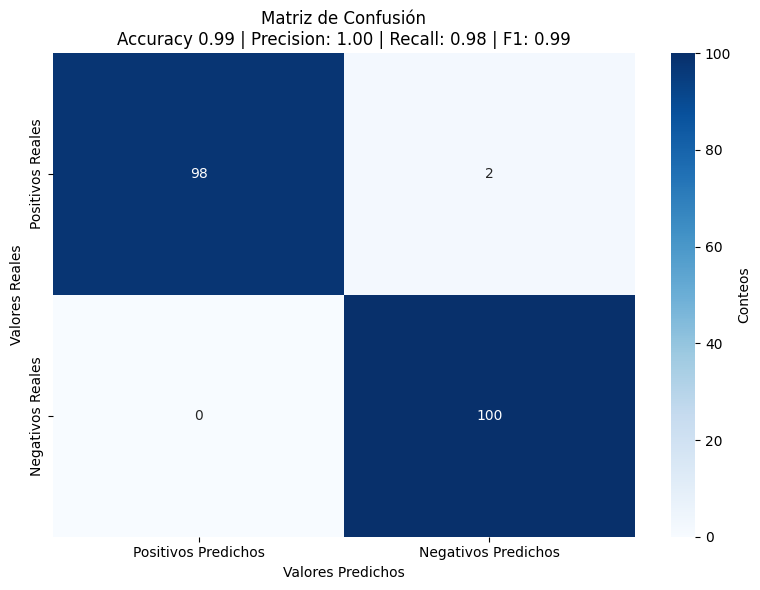

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import seaborn as sns


def calculate_metrics(true_values, predicted_values):
    # Ensure that the labels are ordered as [1, 0] to maintain consistency in the confusion matrix
    matrix = confusion_matrix(true_values, predicted_values, labels=[1, 0])
    accuracy = accuracy_score(true_values, predicted_values)
    precision = precision_score(true_values, predicted_values)
    recall = recall_score(true_values, predicted_values)
    f1 = f1_score(true_values, predicted_values)
    return matrix, accuracy, precision, recall, f1


def plot_confusion_matrix(true_values, predicted_values, normalize=False, show_metrics=True):

    matrix, accuracy, precision, recall, f1 = calculate_metrics(
        true_values, predicted_values
    )

    # Normalization by true class (row)
    if normalize:
        row_sums = matrix.sum(axis=1, keepdims=True)
        # Avoid division by zero
        row_sums[row_sums == 0] = 1
        display_matrix = matrix.astype(float) / row_sums
        fmt = ".2f"
        cbar_label = "Proporción"
    else:
        display_matrix = matrix
        fmt = "d"
        cbar_label = "Conteos"

    # Result: [[TP, FN], [FP, TN]]
    df_cm = pd.DataFrame(
        display_matrix,
        index=["Positivos Reales", "Negativos Reales"],
        columns=["Positivos Predichos", "Negativos Predichos"],
    )

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(df_cm, annot=True, fmt=fmt, cmap="Blues", cbar_kws={"label": cbar_label})
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    title = "Matriz de Confusión"
    if show_metrics:
        title += f"\nAccuracy {accuracy:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1: {f1:.2f}"
    plt.title(title)
    plt.tight_layout()
    plt.show()


# Generate the confusion matrix plot with metrics
plot_confusion_matrix(truth_values, predicted_values, normalize=False, show_metrics=True)